# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [2]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs


In [3]:
from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1]


In [5]:
def confidence_interval(data, confidence=0.95):
    """
    Takes data, returns (mean, lower bound, upper bound)
    """
    n = len(data)
    mean = sum(data) / n
    data = np.array(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
    return (mean, mean - interval, mean + interval)


In [6]:
confidence_interval(coinflips, confidence=0.99)

(0.42, 0.28971848005976064, 0.5502815199402393)

In [7]:
confidence_interval(coinflips, confidence=1.1)

(0.42, nan, nan)

In [8]:
help(stats.bayes_mvs)


Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [9]:
stats.bayes_mvs(coinflips, alpha=0.99)

(Mean(statistic=0.42, minmax=(0.28971848005976064, 0.5502815199402393)),
 Variance(statistic=0.2511340206185568, minmax=(0.17526846362768558, 0.3662601327946428)),
 Std_dev(statistic=0.4998428440976869, minmax=(0.4186507657077502, 0.6051942934253783)))

In [10]:
help(stats.mvsdist)

Help on function mvsdist in module scipy.stats.morestats:

mvsdist(data)
    'Frozen' distributions for mean, variance, and standard deviation of data.
    
    Parameters
    ----------
    data : array_like
        Input array. Converted to 1-D using ravel.
        Requires 2 or more data-points.
    
    Returns
    -------
    mdist : "frozen" distribution object
        Distribution object representing the mean of the data
    vdist : "frozen" distribution object
        Distribution object representing the variance of the data
    sdist : "frozen" distribution object
        Distribution object representing the standard deviation of the data
    
    See Also
    --------
    bayes_mvs
    
    Notes
    -----
    The return values from ``bayes_mvs(data)`` is equivalent to
    ``tuple((x.mean(), x.interval(0.90)) for x in mvsdist(data))``.
    
    In other words, calling ``<dist>.mean()`` and ``<dist>.interval(0.90)``
    on the three distribution objects returned from this func

In [11]:
coinflips_mean_dist, _, _ = stats.mvsdist(coinflips)
coinflips_mean_dist

In [12]:
help(coinflips_mean_dist.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(size=None, random_state=None) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [13]:
coinflips_mean_dist.mean()

0.42

In [14]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.420000
std,0.496045
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
coinflips_mean_dist.rvs(100)  # Bootstrapping! (or the atom of it)

array([0.44229858, 0.44567454, 0.42904259, 0.41356929, 0.45754181,
       0.35049373, 0.49272237, 0.47963143, 0.4291775 , 0.48700739,
       0.48164483, 0.43523959, 0.48560073, 0.40734309, 0.38872874,
       0.45200899, 0.40813419, 0.42500392, 0.49411444, 0.47431287,
       0.32349995, 0.40781916, 0.52941533, 0.43286361, 0.41853727,
       0.51106429, 0.4422225 , 0.50781021, 0.37950113, 0.46201825,
       0.3950797 , 0.38367387, 0.49309518, 0.35589792, 0.40917912,
       0.35129463, 0.4323053 , 0.46133848, 0.40073038, 0.40578273,
       0.46907777, 0.45664889, 0.49794108, 0.45110985, 0.45816828,
       0.42190117, 0.45541997, 0.41460826, 0.45837186, 0.41782169,
       0.42671308, 0.40678137, 0.44181227, 0.40979974, 0.4208004 ,
       0.42277843, 0.4679546 , 0.44283622, 0.37688834, 0.36361269,
       0.41155512, 0.41637225, 0.38104537, 0.3944887 , 0.41696051,
       0.50287168, 0.42456513, 0.3634533 , 0.42571509, 0.46549657,
       0.38206085, 0.46211362, 0.36559548, 0.45696481, 0.33870

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [16]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    '''
    Bayes approach to probability of being drunk
    while receiving a positive test
    '''
    
    result = (prob_positive_drunk * prob_drunk_prior) / (prob_positive)
    return result
    

In [113]:
from scipy import stats
import numpy as np

prob_drunk_prior = 1/1000
prob_positive = 0.08
prob_positive_drunk = 1

d_given_pos = prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)

d_given_pos

0.0125

In [22]:
#for 1000 times

drunk_driving_1000 = np.random.binomial(n=1,p=0.0125,size=1000)
drunk_driving_1000

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
def confidence_interval(data, confidence=0.95):
    """
    Takes data, returns (mean, lower bound, upper bound)
    """
    n = len(data)
    mean = sum(data) / n
    data = np.array(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
    return (mean, mean - interval, mean + interval)

confidence_interval(drunk_driving_1000, confidence=0.99)

(0.012, 0.0031093419061596957, 0.020890658093840303)

In [96]:
drunk_m, drunk_v, drunk_s = stats.bayes_mvs(drunk_driving_1000,alpha=0.99)

In [97]:
drunk_driving_1000_mean_dist,_,_ = stats.mvsdist(drunk_driving_1000)
bootstrapped_drunk_driving_1000 = drunk_driving_1000_mean_dist.rvs(1000)
bootstrapped_drunk_driving_1000

array([ 0.01862182,  0.01727401,  0.01510955,  0.01068126,  0.01391801,
        0.01298932,  0.0151518 ,  0.01051582,  0.00796669,  0.01454316,
        0.00591767,  0.01494616,  0.01358833,  0.00527855,  0.01135236,
        0.01715319,  0.01174506,  0.01075479,  0.01195394,  0.01404117,
        0.01208595,  0.00839068,  0.00979841,  0.01257175,  0.0163567 ,
        0.0139817 ,  0.00806096,  0.00651076,  0.01443047,  0.01538534,
        0.01320911,  0.01420411,  0.01203778,  0.0132334 ,  0.00702788,
        0.00867219,  0.00869502,  0.0131423 ,  0.01140583,  0.0179113 ,
        0.00701505,  0.01614781,  0.00938086,  0.00814349,  0.01653728,
        0.00741946,  0.01814481,  0.01048788,  0.01083387,  0.00713988,
        0.00927711,  0.00512621,  0.0184532 ,  0.01296969,  0.01222329,
        0.01292188,  0.01146371,  0.01566577,  0.0131701 ,  0.01189969,
        0.00937638,  0.00957692,  0.00933316,  0.0147812 ,  0.00588648,
        0.00936234,  0.01104273,  0.01273309,  0.00874664,  0.00

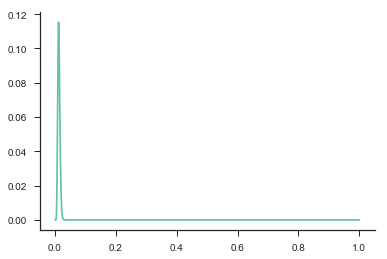

In [118]:
import seaborn as sns
import numpy as np

%matplotlib inline
data = drunk_driving_1000
boot_data = bootstrapped_drunk_driving_1000
params=np.linspace(0,1,1000)

drunk_prior_array = np.array([np.product(stats.bernoulli.pmf(data, p)) for p in params])
p_drunk_prior = drunk_prior_array  / np.sum(drunk_prior_array)
plt.plot(params, p_drunk_prior)
sns.despine()

#well i guess that's one way to do it

$Posterior = \dfrac{likelihood * prior}{\sum_{\theta} likelihood * prior}$

$P(A|B) = \dfrac{P(A,B)}{P(B)}$  

the probability of seeing A given B is the probability of seeing them both divided by the probability of B.

$P(B|A) = \dfrac{P(A,B)}{P(A)}$ 

Or in English, the probability of seeing B given A is the probability of seeing them both divided by the probability of A

$P(A|B)*P(B) = P(B|A)*P(A)$

Which implies:

$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$

In [126]:
## graphing the bayes distributions? and posterior
## in our case P(A) = prob_positive
## and P(B) = prob_drunk_prior
## and so P(B|A) = prob_positive_drunk

def plot_bayes(n_params=1000, true_p=0.064, prior_p=0.0125, n_prior=1000):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_prior)
    likelihood = np.array([np.product(stats.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(stats.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout();
     
    return posterior



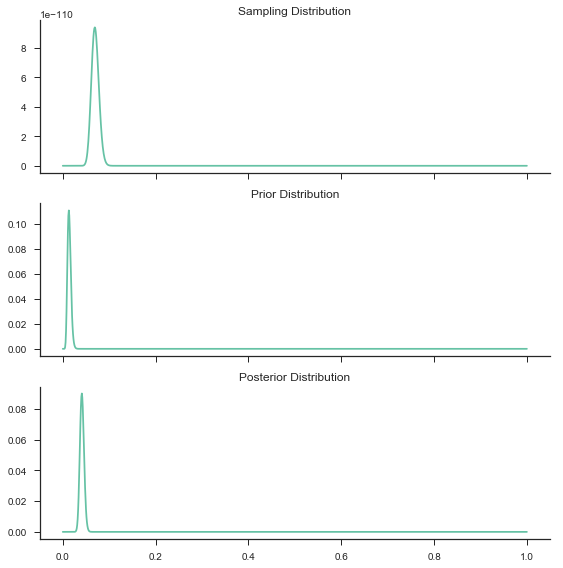

In [129]:
plot_bayes(n_params=1000, true_p=0.064, prior_p=0.0125, n_prior=1000);

From my understanding of Bayesian and Frequentist approaches, the differences between the two can be visualized with how each approach solves a particular problem. For instance, in a Frequentist approach, there is no inference of prior knowledge, and is strictly conditional based on whatever information is present in that instance to solve a problem. And a Bayesian approach would infer prior knowledge and apply that prior knowledge with whatever the problem may be, and use said knowledge as guidance to solve the problem with a differenc 

In [49]:
??stats.bayes_mvs

In [56]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

df = pd.read_csv(url)
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [57]:
df = df.rename(columns={
    'republican': 'political_status',
    'n': 'handicapped_infants',
    'y': 'water_project_cost_sharing',
    'n.1': 'adoption_of_the_budget_resolution',
    'y.1': 'physician_fee_freeze',
    'y.2': 'el_salvador_aid',
    'y.3': 'religious_groups_in_schools',
    'n.2': 'anti_satellite_test_ban',
    'n.3': 'aid_to_nicaraguan_contras',
    'n.4': 'mx_missile',
    'y.4': 'immigration',
    '?': 'synfuels_corporation_cutback',
    'y.5': 'education_spending', 
    'y.6': 'superfund_right_to_sue',
    'y.7': 'crime',
    'n.5': 'duty_free_exports',
    'y.8': 'export_administration_act_south_africa'
})

In [58]:
values = {
    'republican':0,
    'democrat':1,
    'n':0,
    'y':1,
    '?':0.5
}

df = df.replace(values)
df.head()

,political_status,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
1,1,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
4,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [59]:
df.shape

(434, 17)

In [79]:
party = df.political_status.tolist()
water = df.water_project_cost_sharing.tolist()

In [91]:
party = stats.norm.rvs(size=100)
water = stats.norm.rvs(size=100)

In [92]:
## I think what I want to do is find some prior
## like probability_democrat/republican
## then apply that to issues?

party_mean, party_var, party_std = stats.bayes_mvs(party, alpha=0.99)
water_mean, water_var, water_std = stats.bayes_mvs(water, alpha=0.99)

In [93]:
## this is for political parties
party_mean

Mean(statistic=-0.12365089816172253, minmax=(-0.39945321092890135, 0.15215141460545628))

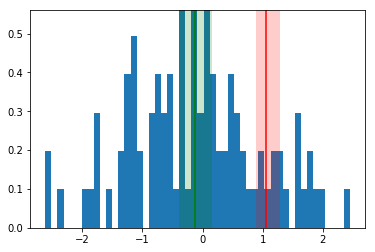

In [94]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(party, bins=50, density=True, label='Party Normal Distribution')
ax.vlines(party_mean.statistic, 0, 1, colors='g', label='Estimated Party Mean')
ax.axvspan(party_mean.minmax[0], party_mean.minmax[1], facecolor='g',
           alpha =0.2, label='Estimated Mean 99%')
ax.vlines(party_std.statistic,0,1, colors='r', label='Estimated Scale/StanDev')
ax.axvspan(party_std.minmax[0],party_std.minmax[1],facecolor='r',alpha=0.2,
           label='Estimated Scale/Standev 99%')
ax.set_ylim([0,0.56])
plt.show()

In [95]:
#i don't think we were supposed to use political party data... but ok..
